<a href="https://colab.research.google.com/github/Nireplag/ML_zoomcamp/blob/main/ML4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, auc, roc_auc_score, recall_score, precision_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

In [54]:
#import dataset

df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [55]:
# select only needed data

col = [
    'Make',
    'Model',
    'Year',
    'Engine HP',
    'Engine Cylinders',
    'Transmission Type',
    'Vehicle Style',
    'highway MPG',
    'city mpg',
    'MSRP'
]

df = df[col]


In [56]:
# rename data
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [57]:
# fill missing as 0
df = df.fillna(0)
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [58]:
#rename field msrp
df = df.rename(columns={'msrp':'price'})
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [59]:
# calculate mean of price
m = df.price.mean()
# create new column with binary price
df['above_average'] = [1 if x > m else 0 for x in df.price]
del df['price']
df.above_average.value_counts()

0    8645
1    3269
Name: above_average, dtype: int64

In [60]:
# split datasets

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

#print size
print(len(df_train), len(df_val), len(df_test))

# reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# separate target variable

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']



7148 2383 2383


In [32]:
# Question 1 -> engine_hp
feat = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

for val in feat:
    auc = roc_auc_score(y_train, df_train[val])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[val])
    print(val, auc)




engine_hp 0.9162886590859151
engine_cylinders 0.764967177543397
highway_mpg 0.6321760621684402
city_mpg 0.6697224118718021


In [33]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
above_average          int64
dtype: object

In [34]:
# transform categorical with the encoder

categorical = ['make', 'model', 'transmission_type', 'vehicle_style']
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [35]:
# question 2
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)



0.979419321059809

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


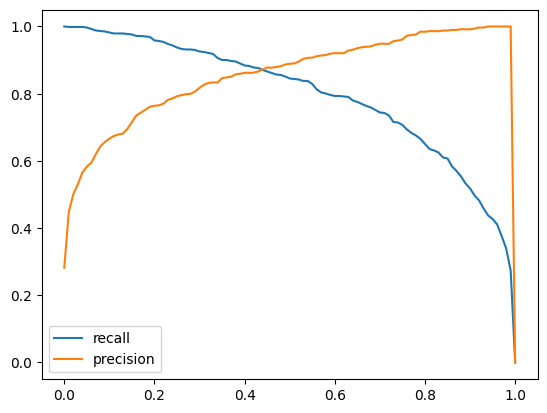

In [42]:
#question 3 - > 0.48

thrs = np.linspace(0,1,101)
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]
rec = []
prec = []

for th in thrs:
  ypred = (y_pred >= th)
  rec.append(recall_score(y_val,ypred))
  prec.append(precision_score(y_val,ypred))

plt.plot(thrs, rec, label = 'recall')
plt.plot(thrs, prec, label = 'precision')
plt.legend()
plt.show()

<ipython-input-51-bfe3e35ea92c>:6: RuntimeWarning: invalid value encountered in divide
  f1 = (2*rec*prec)/(rec+prec)


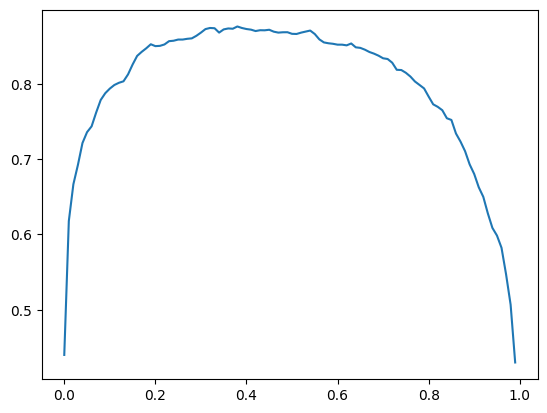

0.8014616321559074
0.8742937853107344
0.8680981595092024
0.8281642917015927


In [51]:
# Question 4 -> 0.32

rec = np.array(rec)
prec = np.array(prec)

f1 = (2*rec*prec)/(rec+prec)

plt.plot(thrs, f1)
plt.show()

f1_dict = dict(zip(thrs,f1))

print(f1_dict[0.12])
print(f1_dict[0.32])
print(f1_dict[0.52])
print(f1_dict[0.72])

In [53]:
def train(df_train, y_train, C):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [61]:
# Question 5 -> 0.003
from sklearn.model_selection import KFold

df_full_train = df_full_train.reset_index(drop=True)


kfold = KFold(n_splits=5, shuffle=True, random_state=1)

df_full_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,Mercedes-Benz,CLK-Class,2007,382.0,8.0,AUTOMATIC,Coupe,22,15,1
1,Nissan,370Z,2016,332.0,6.0,MANUAL,Coupe,26,18,0
2,GMC,Sierra 1500,2017,285.0,6.0,AUTOMATIC,Extended Cab Pickup,24,18,0
3,Porsche,911,2016,350.0,6.0,MANUAL,Convertible,26,19,1
4,Volkswagen,GTI,2013,200.0,4.0,MANUAL,4dr Hatchback,31,21,0


In [65]:

scores = []
for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train['above_average'].values
        y_val = df_val['above_average'].values

        df_train = df_train.drop(['above_average'], axis =1)
        df_val = df_val.drop(['above_average'], axis =1)

        dv, model = train(df_train, y_train, C=1.0)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))


0.979 +- 0.002


In [67]:
# question 6 -> 10

for C in [0.01, 0.1, 0.5, 10]:

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train['above_average'].values
        y_val = df_val['above_average'].values

        df_train = df_train.drop(['above_average'], axis =1)
        df_val = df_val.drop(['above_average'], axis =1)

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))


C=0.01 0.952 +- 0.003
C=0.1 0.972 +- 0.002
C=0.5 0.977 +- 0.002
C=10 0.981 +- 0.003
